In [1]:
import pandas as pd
import xarray as xr

In [2]:
filename = '/home/cr2/cmtorres/repos/ARs_SSI_FEL/data/ARs_Guan_AP_day_all_yr.csv'
df_AR = pd.read_csv(filename, sep='\t')
df_AR['date'] = pd.to_datetime(df_AR['date'])
df_AR.set_index('date', inplace=True)
df_AR

,ARs,date.1
date,,
1979-01-03,13.00211,1979-01-03 18:00:00
1979-01-04,4.00232,1979-01-04 06:00:00
1979-01-05,4.00043,1979-01-05 12:00:00
1979-01-07,6.00120,1979-01-07 18:00:00
1979-01-12,3.00223,1979-01-12 00:00:00
...,...,...
2022-12-17,5.00072,2022-12-17 12:00:00
2022-12-19,5.00174,2022-12-19 12:00:00
2022-12-20,5.00513,2022-12-20 18:00:00


In [3]:
import pandas as pd

def count_N_to_O(df, start_year, end_year):
    """
    Calcula el número de eventos en dos períodos por año:
    - NDJFM: Noviembre (año actual) a Marzo (año siguiente)
    - JJA: Junio, Julio, Agosto (año actual)

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame con índice datetime y una columna con eventos (por ejemplo, 'ARs').
    start_year : int
        Año inicial.
    end_year : int
        Año final.

    Returns:
    --------
    df_out : pd.DataFrame
        DataFrame con columnas: NDJFM y JJA por año.
    """
    # Asegurar datetime
    df.index = pd.to_datetime(df.index)

    records = []

    for year in range(start_year, end_year + 1):
        # NDJFM: Noviembre (year) → Marzo (year+1)
        ndjfm_start = pd.Timestamp(f"{year}-11-01")
        ndjfm_end   = pd.Timestamp(f"{year + 1}-10-31")
        ndjfm_count = df.loc[ndjfm_start:ndjfm_end].shape[0]

        records.append({"year": year + 1, "N_O": ndjfm_count})# "JJA": jja_count

    df_out = pd.DataFrame(records).set_index("year")

    return df_out

def count_NDJFM_JJA(df, start_year, end_year):
    """
    Calcula el número de eventos en dos períodos por año:
    - NDJFM: Noviembre (año actual) a Marzo (año siguiente)
    - JJA: Junio, Julio, Agosto (año actual)

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame con índice datetime y una columna con eventos (por ejemplo, 'ARs').
    start_year : int
        Año inicial.
    end_year : int
        Año final.

    Returns:
    --------
    df_out : pd.DataFrame
        DataFrame con columnas: NDJFM y JJA por año.
    """
    # Asegurar datetime
    df.index = pd.to_datetime(df.index)

    records = []

    for year in range(start_year, end_year + 1):
        # NDJFM: Noviembre (year) → Marzo (year+1)
        ndjfm_start = pd.Timestamp(f"{year}-11-01")
        ndjfm_end   = pd.Timestamp(f"{year + 1}-03-31")
        ndjfm_count = df.loc[ndjfm_start:ndjfm_end].shape[0]

        # JJA: Junio a Agosto (mismo año)
        jja_start = pd.Timestamp(f"{year}-06-01")
        jja_end   = pd.Timestamp(f"{year}-08-31")
        jja_count = df.loc[jja_start:jja_end].shape[0]

        records.append({"year": year + 1, "NDJFM": ndjfm_count})# "JJA": jja_count

    df_out = pd.DataFrame(records).set_index("year")

    return df_out

def count_AMJJASO(df, start_year, end_year):
    """
    Calcula el número de eventos en dos períodos por año:
    - NDJFM: Noviembre (año actual) a Marzo (año siguiente)
    - JJA: Junio, Julio, Agosto (año actual)

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame con índice datetime y una columna con eventos (por ejemplo, 'ARs').
    start_year : int
        Año inicial.
    end_year : int
        Año final.

    Returns:
    --------
    df_out : pd.DataFrame
        DataFrame con columnas: NDJFM y JJA por año.
    """
    # Asegurar datetime
    df.index = pd.to_datetime(df.index)

    records = []

    for year in range(start_year, end_year + 1):
        # NDJFM: Noviembre (year) → Marzo (year+1)
        ndjfm_start = pd.Timestamp(f"{year}-04-01")
        ndjfm_end   = pd.Timestamp(f"{year}-10-31")
        ndjfm_count = df.loc[ndjfm_start:ndjfm_end].shape[0]

        records.append({"year": year + 1, "AMJJASO": ndjfm_count})# "JJA": jja_count

    df_out = pd.DataFrame(records).set_index("year")

    return df_out



def mean_NDJFM_JJA(df, start_year, end_year):
    """
    Calcula el número de eventos en dos períodos por año:
    - NDJFM: Noviembre (año actual) a Marzo (año siguiente)
    - JJA: Junio, Julio, Agosto (año actual)

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame con índice datetime y una columna con eventos (por ejemplo, 'ARs').
    start_year : int
        Año inicial.
    end_year : int
        Año final.

    Returns:
    --------
    df_out : pd.DataFrame
        DataFrame con columnas: NDJFM y JJA por año.
    """
    # Asegurar datetime
    df.index = pd.to_datetime(df.index)

    records = []

    for year in range(start_year, end_year + 1):
        # NDJFM: Noviembre (year) → Marzo (year+1)
        ndjfm_start = pd.Timestamp(f"{year}-11-01")
        ndjfm_end   = pd.Timestamp(f"{year + 1}-03-31")
        ndjfm_count = df.loc[ndjfm_start:ndjfm_end].mean().values[0]

        # JJA: Junio a Agosto (mismo año)
        jja_start = pd.Timestamp(f"{year}-06-01")
        jja_end   = pd.Timestamp(f"{year}-08-31")
        jja_count = df.loc[jja_start:jja_end].mean().values[0]

        records.append({"year": year + 1, "NDJFM": ndjfm_count}) # "JJA": jja_count

    df_out = pd.DataFrame(records).set_index("year")

    return df_out


In [4]:
filename = '/home/cr2/cmtorres/ERA5/WS10_daily_anomalies.nc'
WS10_an = xr.open_dataset(filename)

filename = '/home/cr2/cmtorres/ERA5/T2_daily_anomalies.nc'
T2_an = xr.open_dataset(filename)

In [5]:
lat_p = -62.16
lon_p = -58.89

In [6]:
T2   = T2_an.sel(latitude=lat_p, longitude=lon_p, method='nearest').to_dataframe()[['t2m_anomaly']]
WS10 = WS10_an.sel(latitude=lat_p, longitude=lon_p, method='nearest').to_dataframe()[['ws10_anomaly']]


In [7]:
AR_day_summer = count_NDJFM_JJA(df_AR[['ARs']], 1979, 2019)
AR_day_winter = count_AMJJASO(df_AR[['ARs']], 1979, 2019)
AR_day_year   = count_N_to_O(df_AR[['ARs']], 1979, 2019)
T2_yr      = mean_NDJFM_JJA(T2, 1979, 2019)
WS10_yr    = mean_NDJFM_JJA(WS10, 1979, 2019)

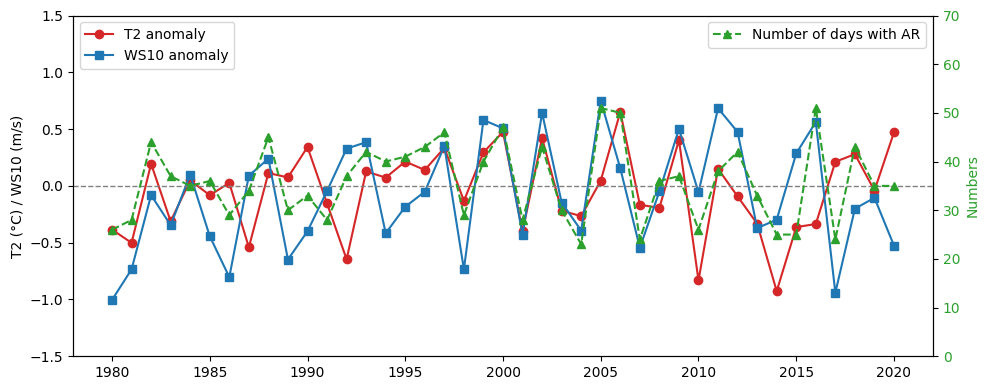

In [22]:
import matplotlib.pyplot as plt

# Ensure indexes are integers (year)
AR_day_summer.index = AR_day_summer.index.astype(int)
T2_yr.index = T2_yr.index.astype(int)
WS10_yr.index = WS10_yr.index.astype(int)

# Create the figure and primary axis 
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot T2 and WS10 on the primary y-axis
ax1.plot(T2_yr.index, T2_yr['NDJFM'], label='T2 anomaly', color='tab:red', marker='o')
ax1.plot(WS10_yr.index, WS10_yr['NDJFM'], label='WS10 anomaly', color='tab:blue', marker='s')
ax1.set_ylabel('T2 (°C) / WS10 (m/s)', color='black')
ax1.set_ylim(-1.5,1.5)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)

# Create secondary y-axis for ARs
ax2 = ax1.twinx()
ax2.plot(AR_day_summer.index, AR_day_summer['NDJFM'], label='Number of days with AR', color='tab:green', linestyle='--', marker='^')
ax2.set_ylabel('Numbers', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')
ax2.set_ylim(0,70)

# Final adjustments
plt.tight_layout()
fig.savefig(f"fig/T2_WS10_ann_ARdays_1980_2022.png", dpi = 300, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)

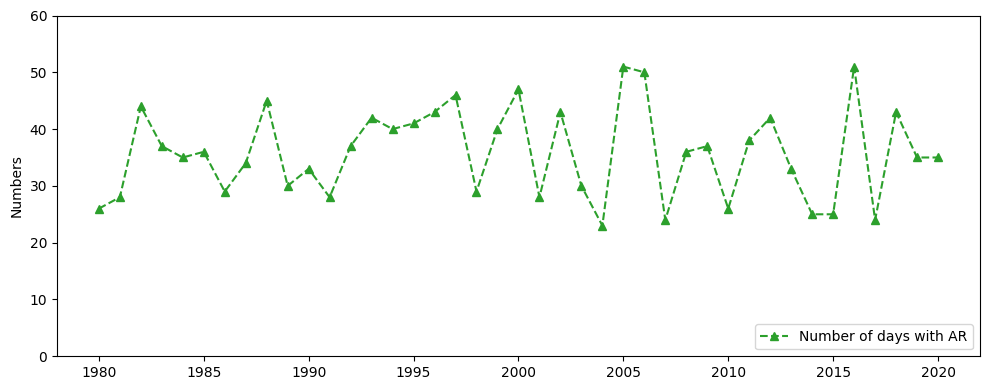

In [20]:
import matplotlib.pyplot as plt

# Ensure indexes are integers (year)
AR_day_summer.index = AR_day_summer.index.astype(int)

# Create the figure and primary axis 
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(AR_day_summer.index, AR_day_summer['NDJFM'], label='Number of days with AR', color='tab:green', linestyle='--', marker='^')
ax1.set_ylabel('Numbers')
#ax1.tick_params(axis='y', labelcolor='tab:green')
ax1.legend(loc='lower right')
ax1.set_ylim(0,60)

# Final adjustments
plt.tight_layout()
fig.savefig(f"fig/ARs_day_summer_1980_2022.png", dpi = 300, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)

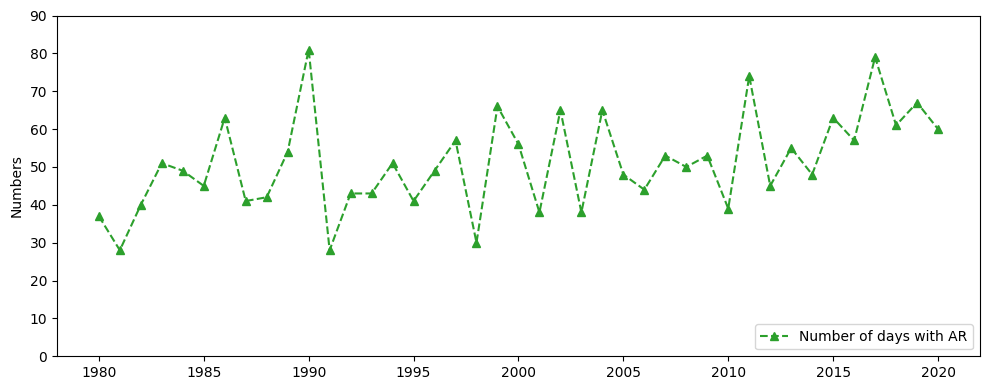

In [18]:
import matplotlib.pyplot as plt

# Ensure indexes are integers (year)
AR_day_winter.index = AR_day_winter.index.astype(int)

# Create the figure and primary axis 
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(AR_day_winter.index, AR_day_winter['AMJJASO'], label='Number of days with AR', color='tab:green', linestyle='--', marker='^')
ax1.set_ylabel('Numbers')
#ax1.tick_params(axis='y', labelcolor='tab:green')
ax1.legend(loc='lower right')
ax1.set_ylim(0,90)

# Final adjustments
plt.tight_layout()
fig.savefig(f"fig/ARs_day_winter_1980_2022.png", dpi = 300, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)

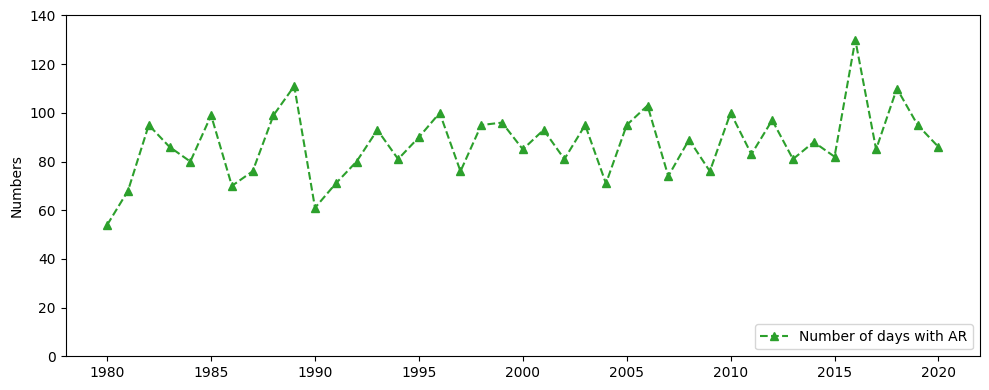

In [17]:
import matplotlib.pyplot as plt

# Ensure indexes are integers (year)
AR_day_year.index = AR_day_year.index.astype(int)

# Create the figure and primary axis 
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(AR_day_year.index, AR_day_year['N_O'], label='Number of days with AR', color='tab:green', linestyle='--', marker='^')
ax1.set_ylabel('Numbers')
#ax1.tick_params(axis='y', labelcolor='tab:green')
ax1.legend(loc='lower right')
ax1.set_ylim(0,140)

# Final adjustments
plt.tight_layout()
fig.savefig(f"fig/ARs_day_annual_1980_2022.png", dpi = 300, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)